In [817]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.metrics import confusion_matrix
import seaborn as sn


In [818]:
#This notebook analyses data from the titanic and fits classification models to predict survivors based on their features
#The data has already been partially processed so certain processes have already been done (e.g., one hot encoding, some cleaning)

In [819]:
#Load and view the data
df = pd.read_csv("Titanic.csv")
df.head()

#Most of the data columns are self explanatory. 
#Passenger ID
#Survived, 1 = survived, 0 = died
#Sex, 1 = male, 0 = female
#Age
#How much the fare cost
#Class of the passengers tickets
#Size of the passengers family
#the passengers title
#Which port they boarded at: Cherbourg, Queenstown or Southampton


,Id,Survived,Sex,Age,Fare,1st_Class,2nd_Class,3rd_Class,Family_size,Title_Mr,Title_Mrs,Title_Master,Title_Miss,Port_C,Port_Q,Port_S
0,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [820]:
#Drop passenger ID because data is irrelevant
df.drop(['Id'], axis=1,inplace = True)


In [821]:
#Check data types
df.info()
#No NaNs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      100 non-null    int64  
 1   Sex           100 non-null    int64  
 2   Age           100 non-null    float64
 3   Fare          100 non-null    float64
 4   1st_Class     100 non-null    int64  
 5   2nd_Class     100 non-null    int64  
 6   3rd_Class     100 non-null    int64  
 7   Family_size   100 non-null    float64
 8   Title_Mr      100 non-null    int64  
 9   Title_Mrs     100 non-null    int64  
 10  Title_Master  100 non-null    int64  
 11  Title_Miss    100 non-null    int64  
 12  Port_C        100 non-null    int64  
 13  Port_Q        100 non-null    int64  
 14  Port_S        100 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 11.8 KB


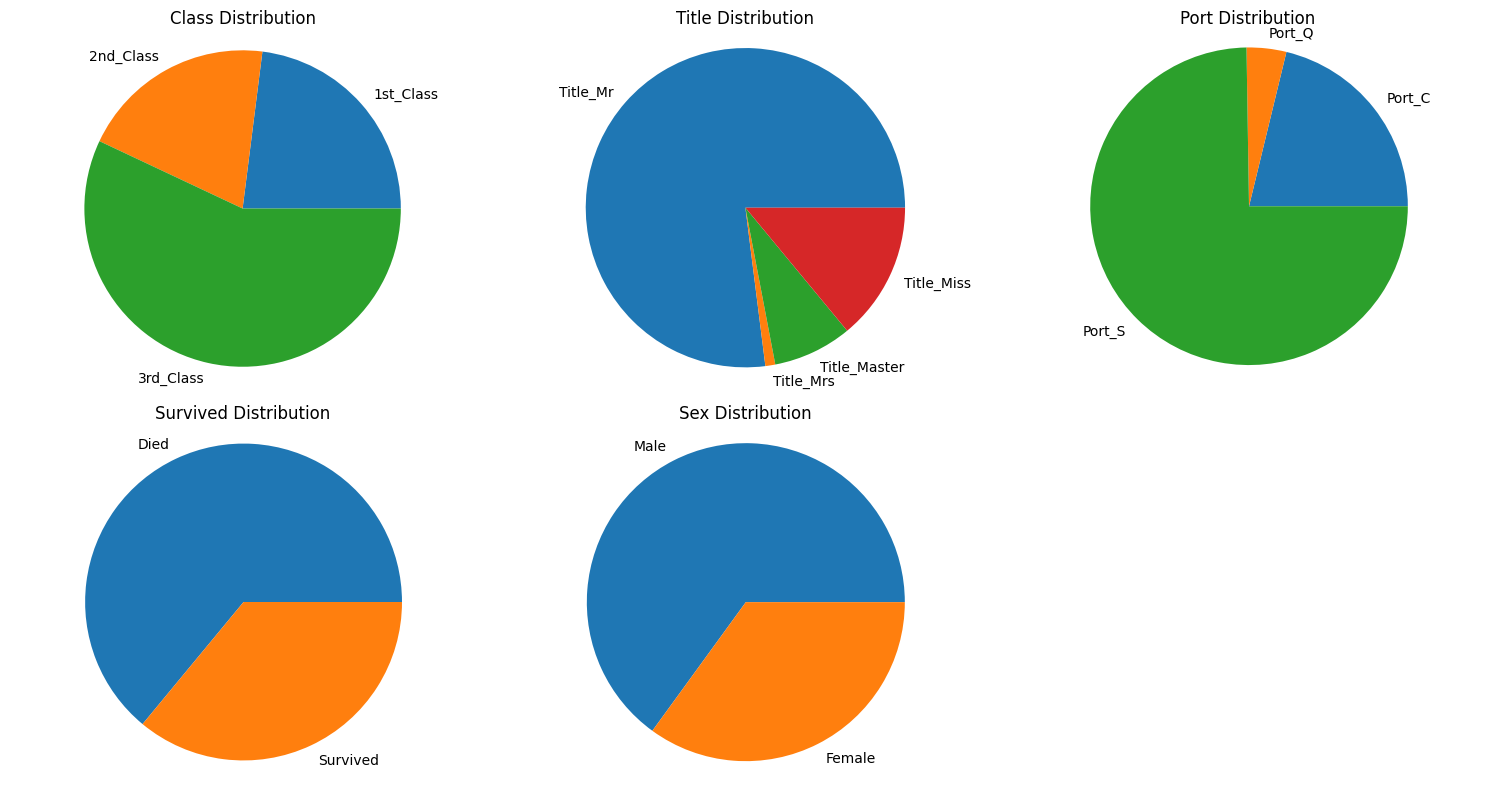

On the ship there were mostly men, with 3rd class tickets from Southampton port


In [822]:
#Plot pie charts to understand data

# Improving labelling to increase readability in plots
df_plot = df
df_plot['Survived_Label'] = df_plot['Survived'].map({0: 'Died', 1: 'Survived'})
df_plot['Sex_Label'] = df_plot['Sex'].map({0: 'Female', 1: 'Male'})

fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Class pie chart
class_columns = df_plot[['1st_Class', '2nd_Class', '3rd_Class']]
class_counts = class_columns.sum()
axes[0, 0].pie(class_counts, labels=class_counts.index)
axes[0, 0].set_title('Class Distribution')
axes[0, 0].axis('equal')

# Title pie chart
title_columns = df_plot[['Title_Mr', 'Title_Mrs', 'Title_Master', 'Title_Miss']]
title_counts = title_columns.sum()
axes[0, 1].pie(title_counts, labels=title_counts.index)
axes[0, 1].set_title('Title Distribution')
axes[0, 1].axis('equal')

# Port pie chart
port_columns = df_plot[['Port_C', 'Port_Q', 'Port_S']]
port_counts = port_columns.sum()
axes[0, 2].pie(port_counts, labels=port_counts.index)
axes[0, 2].set_title('Port Distribution')
axes[0, 2].axis('equal')

# Survived pie chart
survived_counts = df_plot['Survived_Label'].value_counts()
axes[1, 0].pie(survived_counts, labels=survived_counts.index)
axes[1, 0].set_title('Survived Distribution')
axes[1, 0].axis('equal')

# Sex pie chart
sex_counts = df_plot['Sex_Label'].value_counts()
axes[1, 1].pie(sex_counts, labels=sex_counts.index)
axes[1, 1].set_title('Sex Distribution')
axes[1, 1].axis('equal')

# Hide empty subplot in the second row
axes[1, 2].axis('off')

# Display the subplots
plt.tight_layout()
plt.show()


print("On the ship there were mostly men, with 3rd class tickets from Southampton port")

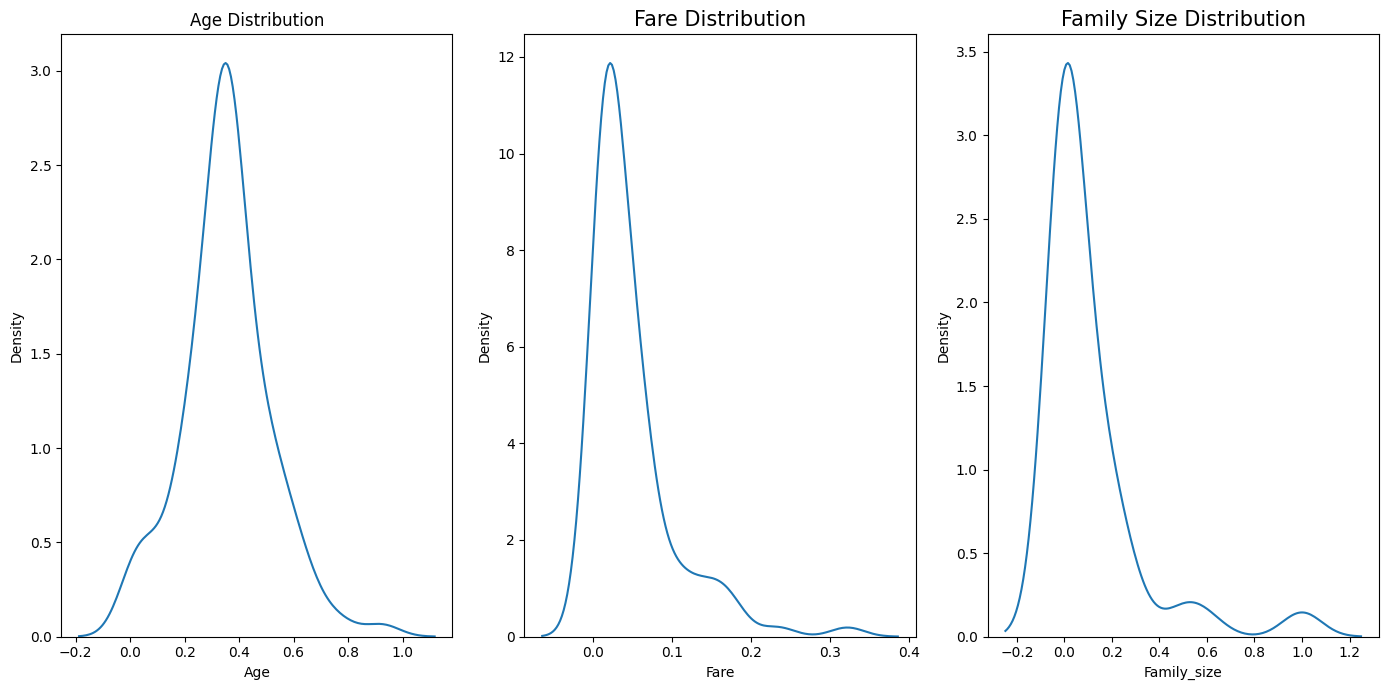

In [823]:
# Plotting density estimation plots to see distribution

plt.figure(figsize=(14, 7))

# Age Plot
plt.subplot(1, 3, 1)
plt.title("Age Distribution")
sns.kdeplot(data=df["Age"])

# Fare plot
plt.subplot(1, 3, 2)
plt.title("Fare Distribution", fontsize=15)
sns.kdeplot(data=df["Fare"])

# Family size plot
plt.subplot(1, 3, 3)
plt.title("Family Size Distribution", fontsize=15)
sns.kdeplot(data=df["Family_size"])

plt.tight_layout()
plt.show()

#It appears that the this data has already been scaled. The data was also one hot encoded so it may be safe to assume that some data processing has already been undertaken

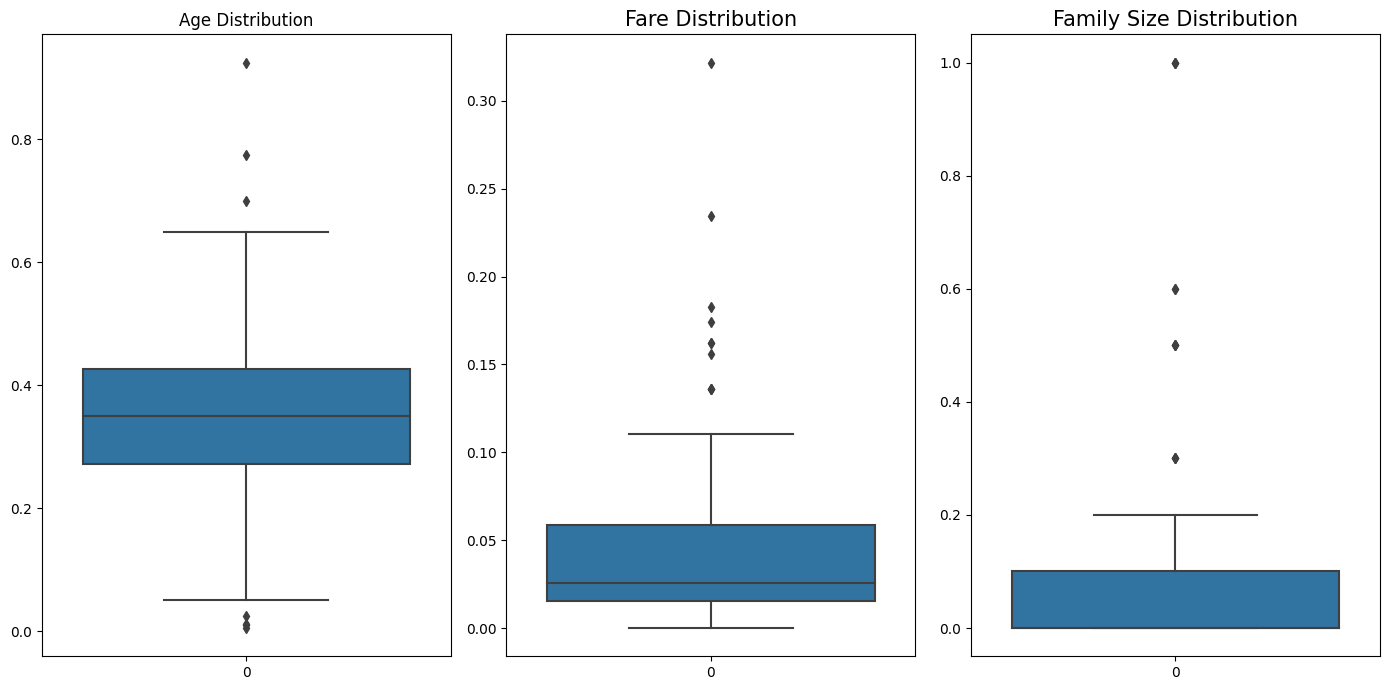

In [824]:
#Plotting box plots to see outliers

plt.figure(figsize=(14, 7))

# Age Plot
plt.subplot(1, 3, 1)
plt.title("Age Distribution")
sns.boxplot(data=df["Age"])

# Fare plot
plt.subplot(1, 3, 2)
plt.title("Fare Distribution", fontsize=15)
sns.boxplot(data=df["Fare"])

#
plt.subplot(1, 3, 3)
plt.title("Family Size Distribution", fontsize=15)
sns.boxplot(data=df["Family_size"])

plt.tight_layout()
plt.show()


In [825]:
#The following section will implement ML techniques to predict survivors using classification

In [826]:
#Split feature data

X = df.drop(columns = ["Survived", "Survived_Label", "Sex_Label"])
X

,Sex,Age,Fare,1st_Class,2nd_Class,3rd_Class,Family_size,Title_Mr,Title_Mrs,Title_Master,Title_Miss,Port_C,Port_Q,Port_S
0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.3375,0.025374,0,1,0,0.0,1,0,0,0,0,0,1
96,0,0.2375,0.058556,1,0,0,0.0,0,0,0,1,0,0,1
97,0,0.3500,0.045771,0,0,1,0.3,0,0,0,1,0,0,1
98,1,0.3250,0.058556,1,0,0,0.0,1,0,0,0,1,0,0


In [827]:
#Split results data
y = df["Survived"]
y

0     0
1     0
2     0
3     0
4     0
     ..
95    0
96    1
97    0
98    1
99    0
Name: Survived, Length: 100, dtype: int64

In [828]:
#Split data set into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) #Split into test and training sets

In [829]:
#Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

#Predict values
y_pred = model.predict(X_test)
y_pred_t = model.predict(X_train)
train_score = sklearn.metrics.accuracy_score(y_train,y_pred_t)
test_score = sklearn.metrics.accuracy_score(y_test,y_pred)

print(f'The accuracy of the training model is {train_score*100:.2f}')
print(f'The accuracy of the Test model is {test_score*100:.2f}')

The accuracy of the training model is 87.14
The accuracy of the Test model is 90.00


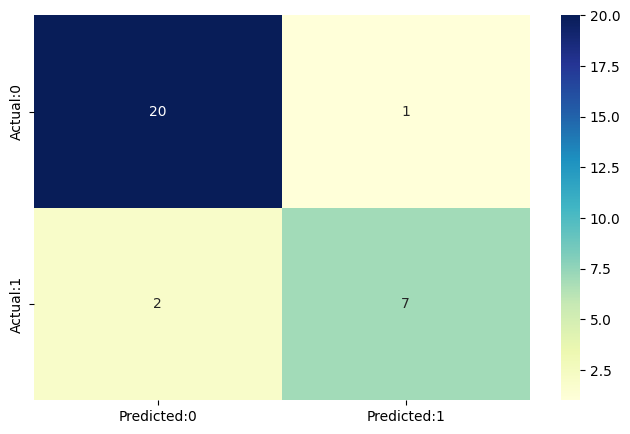

In [830]:
#Use confusion matrix to analyse wellness of fit

cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
plt.show()

#Model predicts data well for non survivors

In [831]:
#Train random forrest model
# rf = RandomForestClassifier(n_estimators= 6 , max_depth=7 ,max_features= 7)
# rf.fit(X_train , y_train)

# acc = (rf.score(X_train , y_train)*100)
# print(f'The accuracy of the training model is {acc:.2f}')
# acc =(rf.score(X_test , y_test)*100)
# print(f'The accuracy of the test model is {acc:.2f}')


In [832]:
#Use confusion matrix to analyse wellness of fit
# cm=confusion_matrix(y_test,y_pred)
# conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
# plt.figure(figsize = (8,5))
# sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
# plt.show()